In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

/home/nakatsuka/anaconda3/envs/tf16/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
input_ = tf.placeholder(tf.float32, shape=[None, 224, 224, 3])

In [3]:
sess = tf.keras.backend.get_session()

In [4]:
tf.keras.backend.set_learning_phase(0)
graph = tf.keras.backend.get_session().graph
model = tf.keras.applications.ResNet50(weights='imagenet', input_tensor=input_)
y = model.output
y_ = tf.argmax(y, axis=-1)
model.trainable = False
logits = graph.get_operation_by_name('fc1000/BiasAdd').outputs[0]

In [5]:
fms = [model.get_layer('add_%d' %i).output for i in [3, 7, 13, 15]]

In [6]:
index = tf.placeholder(tf.int32, [])
alpha = tf.reduce_mean(tf.gradients(logits[:, index], fms[-1])[0], 
                       axis=[1, 2], keepdims=True)
l = tf.nn.relu(tf.reduce_sum(alpha*fms[-1], axis=-1))

In [ ]:
image = tf.keras.preprocessing.image.load_img('2007_001763.jpg', target_size=(224, 224))
x = np.asarray(image, dtype='float32')
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet50.preprocess_input(x)

In [ ]:
image

In [ ]:
tf.keras.applications.resnet50.decode_predictions(sess.run(y,
                                                           feed_dict={input_: x}))

In [10]:
# Index of "French bulldog"
i = 245
sal = sess.run(l, feed_dict={input_: x,
                             index: i})

In [11]:
sal

array([[[0.        , 0.04138249, 0.05124356, 0.02578322, 0.        ,
         0.00104941, 0.01212892],
        [0.06808802, 0.1989921 , 0.221146  , 0.        , 0.        ,
         0.        , 0.        ],
        [0.07306966, 0.12774272, 0.03088752, 0.        , 0.02553536,
         0.        , 0.04189608],
        [0.06160904, 0.17191245, 0.0605023 , 0.08028355, 0.02785201,
         0.        , 0.        ],
        [0.11940895, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.10035114, 0.0094095 , 0.        , 0.01582059, 0.16583852,
         0.        , 0.18639743],
        [0.        , 0.00664997, 0.        , 0.        , 0.        ,
         0.        , 0.00132283]]], dtype=float32)

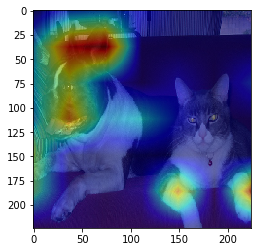

In [12]:
plt.imshow(image)
plt.imshow(scipy.ndimage.zoom(sal[0], (32, 32), order=1), alpha=0.5, cmap='jet')

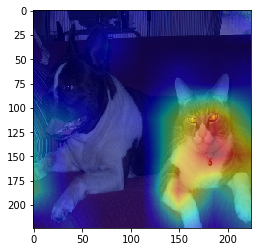

In [13]:
# Index of "tiger cat"
i = 282
sal = sess.run(l, feed_dict={input_: x,
                             index: i})
plt.imshow(image)
plt.imshow(scipy.ndimage.zoom(sal[0], (32, 32), order=1), alpha=0.5, cmap='jet')